### 행정구역 정보(.csv파일)을 읽고 분석하기
- read_csv() 함수로 csv 파일 읽기
- 특정 행과 열을 선택하기
- 컬럼명 변경
- 상관관계 분석(인구수와 면적)
- 시각화
#### Pandas
https://pandas.pydata.org/pandasdocs/stable/user_guide/10min.html


In [2]:
import pandas as pd

data = pd.read_csv('data/data_draw_korea.csv')
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [3]:
data.tail()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시
228,228,198077,충주,6,10,983.70,충청북도,충주시


In [4]:
data.sample(3) # 임의로 3개의 행 가져오기

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
149,149,191233,세종,4,11,465.23,세종특별자치시,세종시
113,113,256584,부산동래,11,16,16.60,부산광역시,동래구
30,30,1125461,수원,6,9,121.09,경기도,수원시


In [5]:
print(data.shape)
print(data.columns)
print(data.index)

(229, 8)
Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')
RangeIndex(start=0, stop=229, step=1)


In [6]:
data.info()
# 문자열 = object타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [7]:
data.describe() # object타입을 제외한 모든 계산

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [8]:
print('인구 수 최대값 ', data['인구수'].max())
print('인구 수 최소값 ', data['인구수'].min())
print('인구 수 평균값 ', data['인구수'].mean())
print('인구 수 표준편차값 ', data['인구수'].std())

인구 수 최대값  1125461
인구 수 최소값  8392
인구 수 평균값  211089.77729257641
인구 수 표준편차값  207437.8370475227


In [9]:
# unique한 광역시/도의 이름
data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [10]:
# 광역시도 값 row counting
data['광역시도'].value_counts()

경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
광주광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: 광역시도, dtype: int64

In [11]:
# 서울특별시에 속한 구에 대한 정보
data.loc[data['광역시도']=='서울특별시'].reset_index(drop=True)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,124,526157,서울강남,6,7,39.50,서울특별시,강남구
1,125,432028,서울강동,8,5,24.60,서울특별시,강동구
2,126,310292,서울강북,5,2,23.60,서울특별시,강북구
3,127,554709,서울강서,4,4,41.40,서울특별시,강서구
4,128,484478,서울관악,5,6,29.60,서울특별시,관악구
5,129,342909,서울광진,7,6,17.05,서울특별시,광진구
6,130,401233,서울구로,4,7,20.11,서울특별시,구로구
7,131,222566,서울금천,5,7,13.01,서울특별시,금천구
8,132,547202,서울노원,6,1,35.44,서울특별시,노원구
9,133,331682,서울도봉,5,1,20.80,서울특별시,도봉구


In [12]:
# 입력으로 광역시도 이름을 받아서 광역시도에 속한 행정구역정보를 반환하는 함수 만들기
def function(name):
    return data.loc[data['광역시도']==name].reset_index(drop=True)
function('경기도')

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,18,53497,가평,9,3,843.040,경기도,가평군
1,19,955384,고양,4,2,267.330,경기도,고양시
2,20,63227,과천,7,7,35.813,경기도,과천시
3,21,327111,광명,3,3,38.500,경기도,광명시
4,22,290210,광주,8,7,431.840,경기도,광주시
5,23,175676,구리,9,4,33.300,경기도,구리시
6,24,273302,군포,5,8,36.350,경기도,군포시
7,25,326523,김포,2,3,276.640,경기도,김포시
8,26,610300,남양주,8,3,458.440,경기도,남양주시
9,27,90398,동두천,7,2,95.680,경기도,동두천시


In [13]:
# 서울특별시의 인구수의 평균과 표준편차
print('평균 ', data.loc[data['광역시도']=='서울특별시', '인구수'].mean())
print('표준편차 ', data.loc[data['광역시도']=='서울특별시', '인구수'].std())

평균  375792.28
표준편차  125231.24797500289


In [15]:
# 경기도 인구수의 평균과 표준편차(함수로 만들어서 출력하기)
def avg_std(name):
    print(f'광역시도 = {name}')
    print('인구수 평균 ', data.loc[data['광역시도']== name, '인구수'].mean())
    print('인구수 표준편차 ', data.loc[data['광역시도']==name, '인구수'].std())
avg_std('경기도')

광역시도 = 경기도
인구수 평균  378845.48387096776
인구수 표준편차  304548.39514203876


In [23]:
for sido_name in data['광역시도'].unique():
    avg_std(sido_name)

광역시도 = 강원도
인구수 평균  79413.22222222222
인구수 표준편차  87316.38323837094
광역시도 = 경기도
인구수 평균  378845.48387096776
인구수 표준편차  304548.39514203876
광역시도 = 경상남도
인구수 평균  174693.72222222222
인구수 표준편차  245796.4650767224
광역시도 = 경상북도
인구수 평균  109085.39130434782
인구수 표준편차  124954.74088490057
광역시도 = 광주광역시
인구수 평균  287641.8
인구수 표준편차  137076.68320578814
광역시도 = 대구광역시
인구수 평균  297306.25
인구수 표준편차  174375.39437968715
광역시도 = 대전광역시
인구수 평균  293535.4
인구수 표준편차  111853.57188217103
광역시도 = 부산광역시
인구수 평균  207724.4375
인구수 표준편차  106246.04138380481
광역시도 = 서울특별시
인구수 평균  375792.28
인구수 표준편차  125231.24797500289
광역시도 = 세종특별자치시
인구수 평균  191233.0
인구수 표준편차  nan
광역시도 = 울산광역시
인구수 평균  221117.0
인구수 표준편차  64163.28658196991
광역시도 = 인천광역시
인구수 평균  276657.5
인구수 표준편차  199353.5964908417
광역시도 = 전라남도
인구수 평균  77298.31818181818
인구수 표준편차  74413.25322969875
광역시도 = 전라북도
인구수 평균  124217.71428571429
인구수 표준편차  168327.13482128442
광역시도 = 제주특별자치도
인구수 평균  287936.5
인구수 표준편차  201620.89205362622
광역시도 = 충청남도
인구수 평균  129741.93333333333
인구수 표준편차  141125.1080796583
광역시도 = 충청

In [21]:
# 경상북도에 속한 행정구역의 행정구역, 인구수, 면적을 출력하고 인구수가 많은 순서대로 정렬하고 index를 순서대로 출력하기
data.loc[data['광역시도']=='경상북도', ['행정구역','인구수','면적']].sort_values(by='인구수', ascending=False).reset_index(drop=True)

,행정구역,인구수,면적
0,포항시,488395,1127.00
1,구미시,396685,616.10
2,경산시,251220,411.58
3,경주시,242618,1323.85
4,안동시,157317,1519.00
5,김천시,127941,1009.56
6,칠곡군,112446,451.00
7,영주시,101612,668.45
8,상주시,93305,1254.82
9,영천시,91214,919.76


In [28]:
#iloc 사용하기
# index가 20부터 25까지, 컬럼명이 인구수부터 광역시도까지
print(data.loc[20:25, '인구수':'광역시도'])
print(data.iloc[20:25, 1:4])

       인구수 shortName  x  y       면적 광역시도
20   63227        과천  7  7   35.813  경기도
21  327111        광명  3  3   38.500  경기도
22  290210        광주  8  7  431.840  경기도
23  175676        구리  9  4   33.300  경기도
24  273302        군포  5  8   36.350  경기도
25  326523        김포  2  3  276.640  경기도
       인구수 shortName  x
20   63227        과천  7
21  327111        광명  3
22  290210        광주  8
23  175676        구리  9
24  273302        군포  5


In [31]:
# 인구 수가 전국 평균 인구수보다 적은 지역을 선택하고, 결과를 엑셀로 저장하기
avg_value = data['인구수'].mean()
pop_avg_small = data.loc[data['인구수'] < avg_value, '인구수':'행정구역'].sort_values(by='인구수',ascending=False).reset_index(drop=True)
pop_avg_small.to_excel('data/평균인구수미만지역.xlsx')

In [33]:
# 컬럼명 변경
data = data.rename(columns={'Unnamed: 0':'seq'})

In [34]:
# seq 컬럼을 index로 변경하기
data.set_index('seq')

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
224,127462,제천,8,10,882.47,충청북도,제천시
225,34480,증평,6,11,81.84,충청북도,증평군
226,62809,진천,5,11,406.08,충청북도,진천군


In [36]:
data.head()

,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [42]:
# 경기도에서 인구수가 가장 많은 행정구역은?
data.loc[data['광역시도']=='경기도', ['행정구역', '인구수']].sort_values(by='인구수',ascending=False).head()

,행정구역,인구수
30,수원시,1125461
19,고양시,955384
40,용인시,915005
29,성남시,911628
28,부천시,805473


In [45]:
pop_max_kyeong = data.loc[data['광역시도']=='경기도', '인구수'].max()
pop_max_kyeong

1125461

In [46]:
# 광역시도가 경기도인 조건1, 인구수가 pop_max_kyeong와 같은 조건2
data.loc[(data['광역시도']=='경기도')&(data['인구수']==pop_max_kyeong)]

,seq,인구수,shortName,x,y,면적,광역시도,행정구역
30,30,1125461,수원,6,9,121.09,경기도,수원시


In [54]:
# 광역시도별로 인구수가 가장 많은 행정구역은?
# unique(), value_counts(), max() + 사용자 정의 함수 선언
# sido_name(광역시도)을 argument로 받아서, 특정 광역시도 중에서 가장 인구가 많은 행정구역을 반환하는 함수 정의하기
def pop_max_city(name):
    pop_max_value = data.loc[data['광역시도']==name, '인구수'].max()
    #print(pop_max_value)
    return data.loc[(data['광역시도']==name) & (data['인구수'] == pop_max_value), ['광역시도', '행정구역', '인구수']]

pop_max_city('서울특별시')

,광역시도,행정구역,인구수
141,서울특별시,송파구,615487


In [57]:
for sido_name in data['광역시도'].unique():
    print(pop_max_city(sido_name))

  광역시도 행정구역     인구수
8  강원도  원주시  313851
   광역시도 행정구역      인구수
30  경기도  수원시  1125461
    광역시도 행정구역      인구수
61  경상남도  창원시  1010040
    광역시도 행정구역     인구수
89  경상북도  포항시  488395
     광역시도 행정구역     인구수
93  광주광역시   북구  439683
     광역시도 행정구역     인구수
96  대구광역시  달서구  584517
      광역시도 행정구역     인구수
105  대전광역시   서구  475094
      광역시도  행정구역     인구수
123  부산광역시  해운대구  397134
      광역시도 행정구역     인구수
141  서울특별시  송파구  615487
        광역시도 행정구역     인구수
149  세종특별자치시  세종시  191233
      광역시도 행정구역     인구수
150  울산광역시   남구  327270
      광역시도 행정구역     인구수
160  인천광역시  부평구  527153
     광역시도 행정구역     인구수
177  전라남도  여수시  263166
     광역시도 행정구역     인구수
198  전라북도  전주시  630708
        광역시도 행정구역     인구수
202  제주특별자치도  제주시  430504
     광역시도 행정구역     인구수
214  충청남도  천안시  584912
     광역시도 행정구역     인구수
227  충청북도  청주시  790216


In [59]:
# 새로운 DataFrame 객체 생성
pop_max_city_df = pd.DataFrame(columns=['광역시도', '행정구역', '인구수'])
for sido_name in data['광역시도'].unique():
    pop_max_city_df = pop_max_city_df.append(pop_max_city(sido_name)).reset_index(drop=True)
    
pop_max_city_df

,광역시도,행정구역,인구수
0,강원도,원주시,313851
1,경기도,수원시,1125461
2,경상남도,창원시,1010040
3,경상북도,포항시,488395
4,광주광역시,북구,439683
5,대구광역시,달서구,584517
6,대전광역시,서구,475094
7,부산광역시,해운대구,397134
8,서울특별시,송파구,615487
9,세종특별자치시,세종시,191233


In [65]:
print(len(pop_max_city_df))
pop_max_city_df.index # index 확인

17


RangeIndex(start=0, stop=17, step=1)

In [61]:
import numpy as np 
print(np.arange(1, 10+1))
np.arange(1, len(pop_max_city_df) + 1)

[ 1  2  3  4  5  6  7  8  9 10]


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [62]:
print(pop_max_city_df.index)
pop_max_city_df

RangeIndex(start=0, stop=17, step=1)


,광역시도,행정구역,인구수
0,강원도,원주시,313851
1,경기도,수원시,1125461
2,경상남도,창원시,1010040
3,경상북도,포항시,488395
4,광주광역시,북구,439683
5,대구광역시,달서구,584517
6,대전광역시,서구,475094
7,부산광역시,해운대구,397134
8,서울특별시,송파구,615487
9,세종특별자치시,세종시,191233


### 상관계수
- 인구수와 면적간의 관련성이 있는 지 살펴보기 위해서 상관계수 구하기
- 상관계수 값은 -1 ~ 1 사이의 값이며, 0에 가까울수록 관련성이 낮고, 1에 가까울수록 관련성이 높음
- 음수는 반비례(면적은 넓은 반면, 인구수는 적은 경우), 양수는 비례(면적이 넓은데, 인구수도 많은 경우)
- corr() 함수 사용

In [63]:
# 전체 행정구역의 면적과 인구수의 상관계수 구하기
data['면적'].corr(data['인구수'])

-0.3460351605045771

In [64]:
# 서울특별시의 면적과 인구수의 상관계수 구하기
seoul_df = data.loc[data['광역시도'] == '서울특별시']
seoul_df['면적'].corr(data['인구수'])

0.664426818890978

### Group by
- 광역시도별 인구수의 합계 ex. 광역시도가 서울특별시인 인구수 합계
- ~별에 해당하는 컬럼명이나 컬럼값을 groupby()함수의 인자로 전달
- Series 객체의 groupby() 함수는 컬럼값을 인자로 전달
- DataFrame 객체의 groupby() 함수는 컬럼명을 인자로 전달
- Series와 DataFrame의 차이 : Series는 행이나 열 하나, DataFrame은 모든 행과 열

In [68]:
# Series 객체
print(type(data['광역시도']))
data['광역시도'].head(2)

<class 'pandas.core.series.Series'>


0    강원도
1    강원도
Name: 광역시도, dtype: object

In [71]:
print(type(data.loc[0]))
data.loc[0]

<class 'pandas.core.series.Series'>


seq                0
인구수           202520
shortName         강릉
x                 11
y                  4
면적           1040.07
광역시도             강원도
행정구역             강릉시
Name: 0, dtype: object

In [70]:
# DataFrame 객체
print(type(data[['광역시도','행정구역']]))
data[['광역시도','행정구역']].head(2)

<class 'pandas.core.frame.DataFrame'>


,광역시도,행정구역
0,강원도,강릉시
1,강원도,고성군


In [72]:
print(type(data.loc[0:1]))
data.loc[0:1]

<class 'pandas.core.frame.DataFrame'>


,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군


In [75]:
# Series 객체 사용 - 광역시도별 인구수의 합계
data['인구수'].groupby(data['광역시도']).sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [79]:
# DataFrame 객체 사용 - 광역시도별 인구수의 합계
data.groupby('광역시도')['인구수'].sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [82]:
# 광역시도별, 행정구역별 인구수의 합계
groupby_df = data.groupby(['광역시도','행정구역'])['인구수'].sum()
groupby_df.to_excel('data/광역시도및행정구역별인구수의합계.xlsx', sheet_name='인구수')

##### 엑셀 수치데이터에 ,(콤마)찍기

In [98]:
# Pandas 내의 Excel writer를 이용해서 엑셀 객체 만들기
writer = pd.ExcelWriter('data/광역시도별인구수의합계1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
groupby_df.to_excel(writer, sheet_name='인구수합계')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book # worksheet를 가지고 올 때 사용
worksheet = writer.sheets['인구수합계'] # '인구수합계' sheet 가지고 옴

# Set a currency number format for a column.
num_format = workbook.add_format({'num_format': '#,###'}) # 수치데이터에 ,를 찍도록 format
worksheet.set_column('C:C', None, num_format)

# Close the Pandas Excel writer and output the Excel file.
writer.save() # 저장

In [99]:
# 광역시도별 인구수의 max, mean, std 여러 개의 집계함수 조회하기
# DataFrame의 agg() 함수 사용
# fillna(0) : NaN 값을 0으로 바꿈
# sort_values(by='std',ascending=False) : 표준편차가 높은 순서대로 정렬
group_agg_df = data.groupby('광역시도')['인구수'].agg(['max','mean','std']).fillna(0).sort_values(by='std',ascending=False)
group_agg_df

,max,mean,std
광역시도,,,
경기도,1125461,378845.483871,304548.395142
경상남도,1010040,174693.722222,245796.465077
충청북도,790216,134974.545455,223460.356657
제주특별자치도,430504,287936.500000,201620.892054
인천광역시,527153,276657.500000,199353.596491
대구광역시,584517,297306.250000,174375.394380
전라북도,630708,124217.714286,168327.134821
충청남도,584912,129741.933333,141125.108080
광주광역시,439683,287641.800000,137076.683206


In [100]:
# 소숫점 둘째자리까지만 출력
group_agg_df.style.format('{0:.2f}')

,max,mean,std
광역시도,,,
경기도,1125461.00,378845.48,304548.40
경상남도,1010040.00,174693.72,245796.47
충청북도,790216.00,134974.55,223460.36
제주특별자치도,430504.00,287936.50,201620.89
인천광역시,527153.00,276657.50,199353.60
대구광역시,584517.00,297306.25,174375.39
전라북도,630708.00,124217.71,168327.13
충청남도,584912.00,129741.93,141125.11
광주광역시,439683.00,287641.80,137076.68


In [101]:
group_agg_df.reset_index(level='광역시도') # 원본은 바뀌지 않음(출력만)

,광역시도,max,mean,std
0,경기도,1125461,378845.483871,304548.395142
1,경상남도,1010040,174693.722222,245796.465077
2,충청북도,790216,134974.545455,223460.356657
3,제주특별자치도,430504,287936.500000,201620.892054
4,인천광역시,527153,276657.500000,199353.596491
5,대구광역시,584517,297306.250000,174375.394380
6,전라북도,630708,124217.714286,168327.134821
7,충청남도,584912,129741.933333,141125.108080
8,광주광역시,439683,287641.800000,137076.683206
9,서울특별시,615487,375792.280000,125231.247975


In [102]:
group_agg_df.reset_index(level='광역시도', inplace=True) # 출력되지 않음(원본이 바뀜)

In [103]:
# 행과 열을 바꿈 : T 속성(properties) or transpose()함수 사용
group_agg_df.T # group_agg_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
광역시도,경기도,경상남도,충청북도,제주특별자치도,인천광역시,대구광역시,전라북도,충청남도,광주광역시,서울특별시,경상북도,대전광역시,부산광역시,강원도,전라남도,울산광역시,세종특별자치시
max,1125461,1010040,790216,430504,527153,584517,630708,584912,439683,615487,488395,475094,397134,313851,263166,327270,191233
mean,378845.483871,174693.722222,134974.545455,287936.5,276657.5,297306.25,124217.714286,129741.933333,287641.8,375792.28,109085.391304,293535.4,207724.4375,79413.222222,77298.318182,221117.0,191233.0
std,304548.395142,245796.465077,223460.356657,201620.892054,199353.596491,174375.39438,168327.134821,141125.10808,137076.683206,125231.247975,124954.740885,111853.571882,106246.041384,87316.383238,74413.25323,64163.286582,0.0


### 시각화
- plot이 출력되려면 show() 함수를 호출을 해야하지만, jupyter에서는 사용하지 않아도 됨
- 대신, %matplotlib inline 설정을 해줘야 함
- 한글폰트 설정 필요
- plot에 대한 설정은 matplotlib의 함수를 사용하고, plot을 그려주는 기능은 seaborn의 함수를 사용

In [105]:
%matplotlib inline

In [106]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print('matplotlib', matplotlib.__version__)
print('seaborn', sns.__version__)

matplotlib 3.4.3
seaborn 0.11.2


In [109]:
# 폰트 이름과 파일 정보 출력 : list comprehension
[(font.name, font.fname) for font in fm.fontManager.ttflist if 'Ma' in font.name]

[('Maiandra GD', 'C:\\WINDOWS\\Fonts\\MAIAN.TTF'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunsl.ttf'),
 ('Maiandra GD', 'C:\\Windows\\Fonts\\MAIAN.TTF'),
 ('Magic R', 'C:\\WINDOWS\\Fonts\\HMKMMAG.TTF'),
 ('Magic R', 'C:\\Windows\\Fonts\\HMKMMAG.TTF'),
 ('Magneto', 'C:\\Windows\\Fonts\\MAGNETOB.TTF'),
 ('Matura MT Script Capitals', 'C:\\Windows\\Fonts\\MATURASC.TTF'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgun.ttf'),
 ('Marlett', 'C:\\WINDOWS\\Fonts\\marlett.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Matura MT Script Capitals', 'C:\\WINDOWS\\Fonts\\MATURASC.TTF'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunbd.ttf'),
 ('Magneto', 'C:\\WINDOWS\\Fonts\\MAGNETOB.TTF')]

In [117]:
# 한글 폰트 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
# matplotlib의 rc(run command) 함수를 사용해서 폰트이름 설정
matplotlib.rc('font', family=font_prop)

Malgun Gothic


### Figure, Axes
- Figure는 Plot이 그려지는 도화지
- 
- Figure에 Axes를 여러 개 생성해서 Figure을 분할해서 Plot을 그릴 수 있음
- seaborn()에서 제공하는 막대그래프를 그릴 수 있는 barplot()함수 사용

In [112]:
seoul_df.head()

,seq,인구수,shortName,x,y,면적,광역시도,행정구역
124,124,526157,서울강남,6,7,39.5,서울특별시,강남구
125,125,432028,서울강동,8,5,24.6,서울특별시,강동구
126,126,310292,서울강북,5,2,23.6,서울특별시,강북구
127,127,554709,서울강서,4,4,41.4,서울특별시,강서구
128,128,484478,서울관악,5,6,29.6,서울특별시,관악구


Figure(1296x864)
AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


<AxesSubplot:xlabel='행정구역', ylabel='면적'>

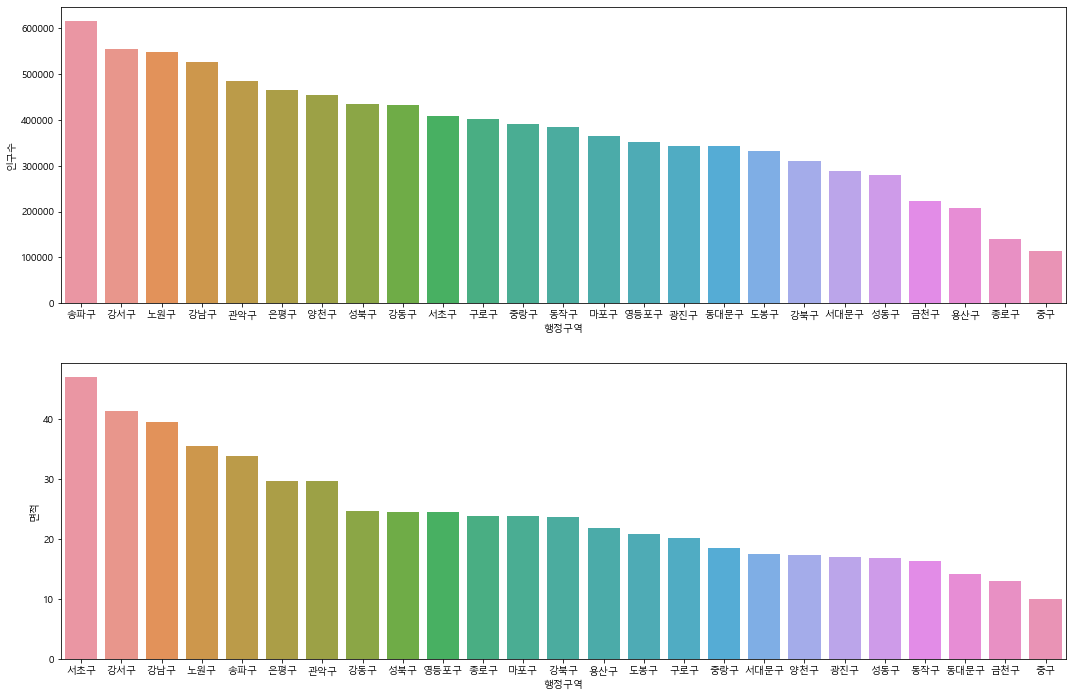

In [129]:
# figure : 전체 subplot
# axe : 몇 개의 그래프를 그릴 건지 -> nrows=2, ncols=1 => 2X1행렬 만큼 그래프 갯수
figure,(axes1,axes2) = plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(18,12) # 크기 지정
print(figure)
print(axes1)
print(axes2)
# x축 : 행정구역, y축 : 인구수/면적, data : 어떤 data를 가지고 그래프를 그릴 것인지
sns.barplot(x='행정구역', y='인구수',  data=seoul_df.sort_values(by='인구수',ascending=False), ax=axes1)
sns.barplot(x='행정구역', y='면적',  data=seoul_df.sort_values(by='면적',ascending=False), ax=axes2)

<AxesSubplot:xlabel='광역시도', ylabel='인구수'>

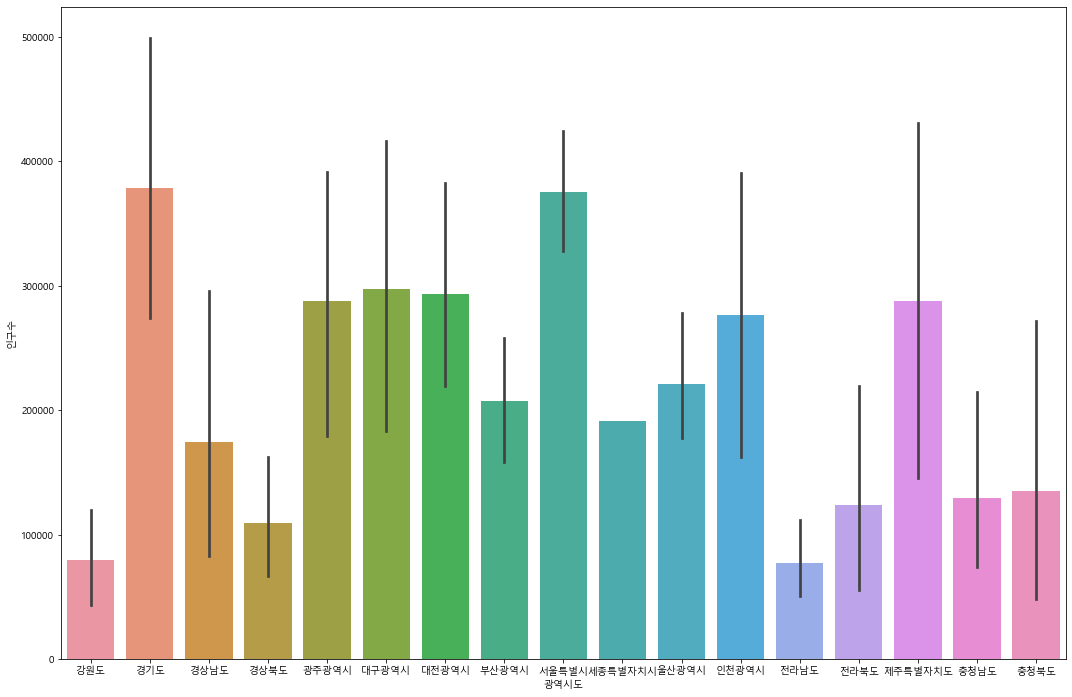

In [134]:
figure, axe1 = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,12)
sns.barplot(x='광역시도', y='인구수', data=data, ax=axe1)
# 밑 그래프의 검정선은 표준편차를 나타냄

#### Practice1 : 광역시도별로 인구수가 가장 많고, 면적이 가장 넓은 행정구역은?
- unique(), value_counts(), max() 함수 사용 + 사용자 정의 함수 선언
- 1단계 : 광역시도별 면적이 가장 넓은 행정구역
    - 광역시도 | 행정구역 | 면적
- 2단계 : 광역시도별 인구수가 가장 많고, 면적이 가장 넓은 행정구역
    - 광역시도 | 행정구역 | 인구수 | 면적

#### Practice2 : 광역시도별로 인구수와 면적 간의 상관계수 구하기

#### Practice3 : 광역시도 이름을 인자로 받아서 인구수와 면적을 보여주는 barplot을 그려주는 함수 정의하기

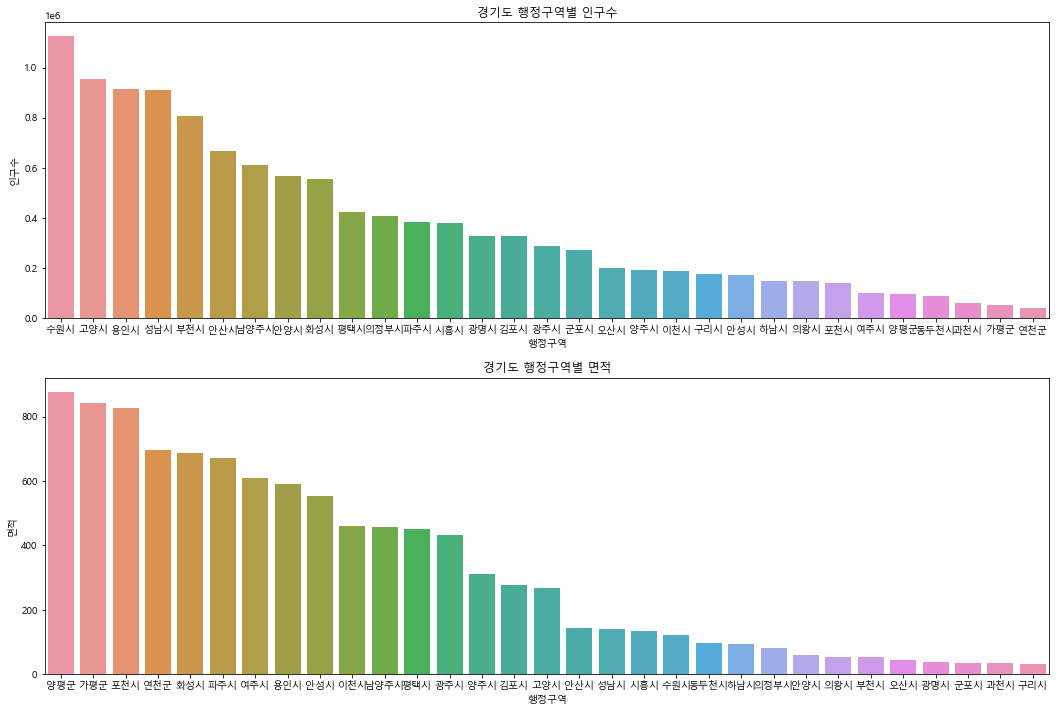

In [132]:
def barplot_func(sido_name):
    df = data.loc[data['광역시도'] == sido_name]
    figure,(axes1,axes2) = plt.subplots(nrows=2,ncols=1)
    figure.set_size_inches(18,12)
    pop_plot = sns.barplot(x='행정구역', y='인구수',  data=df.sort_values(by='인구수',ascending=False), ax=axes1)
    pop_plot.set_title(f'{sido_name} 행정구역별 인구수')
    area_plot = sns.barplot(x='행정구역', y='면적',  data=df.sort_values(by='면적',ascending=False), ax=axes2)
    area_plot.set_title(f'{sido_name} 행정구역별 면적')
    
barplot_func('경기도')

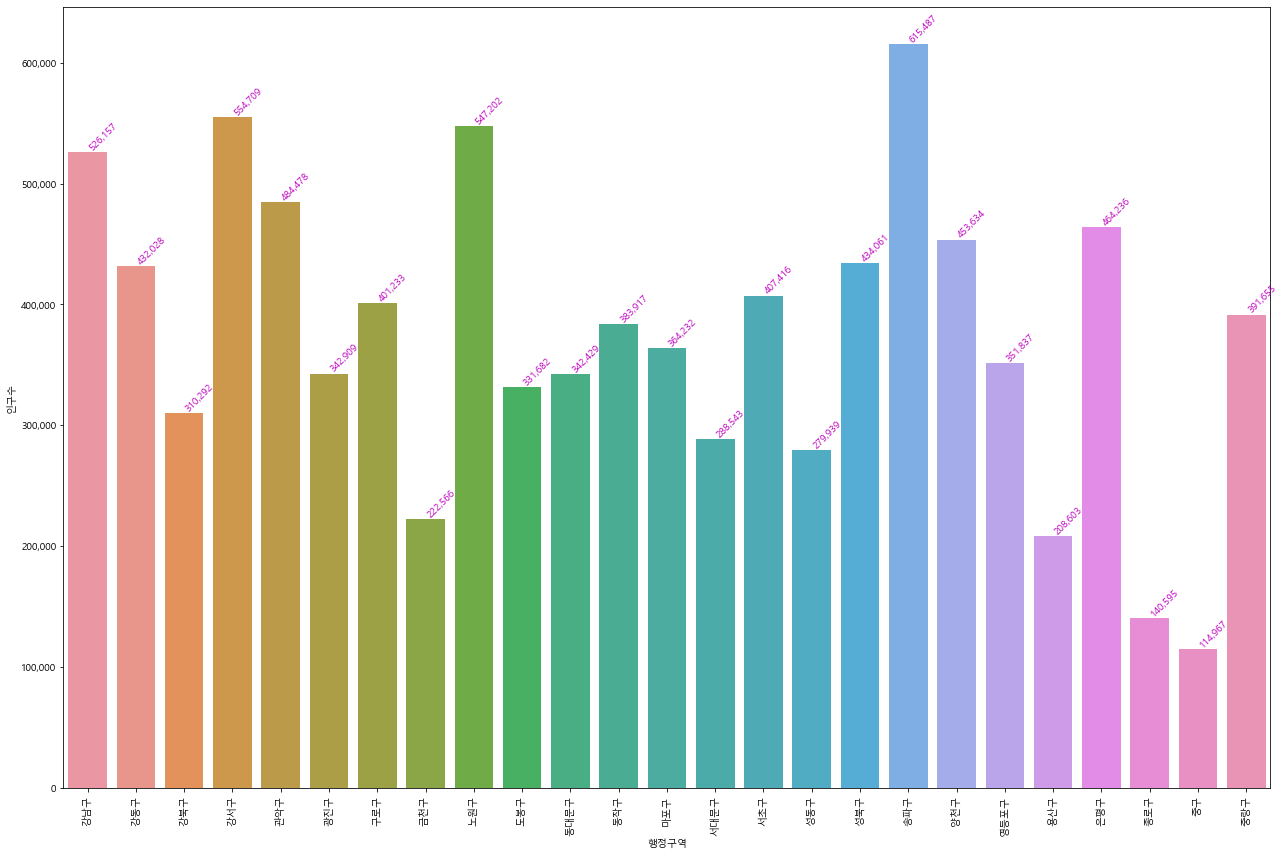

In [139]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.barplot(data=seoul_df, x='행정구역', y='인구수', ax=ax1)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc:"{:,}".format(int(x)))) # y축 천단위마다 ,붙이기
ax1.set(ylabel='인구수')
# x축 도시 이름 90도 회전
for item in ax1.get_xticklabels():
    item.set_rotation(90)
# 도시별 인구수 출력(천단위마다 ,출력 + 색깔은 마젠타(핑크) + 45도 회전)
for i, v in enumerate(seoul_df['인구수'].iteritems()):
    ax1.text(i, v[1], "{:,}".format(v[1]), color='m', va='bottom',rotation=45) # v[1] : 인구수
plt.tight_layout() # tight하게 그려주는 함수